In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mortality/2014_codes.json
/kaggle/input/mortality/2007_data.csv
/kaggle/input/mortality/2007_codes.json
/kaggle/input/mortality/2012_data.csv
/kaggle/input/mortality/2010_data.csv
/kaggle/input/mortality/2009_data.csv
/kaggle/input/mortality/2011_data.csv
/kaggle/input/mortality/2015_codes.json
/kaggle/input/mortality/2011_codes.json
/kaggle/input/mortality/2006_data.csv
/kaggle/input/mortality/2010_codes.json
/kaggle/input/mortality/2005_data.csv
/kaggle/input/mortality/2008_codes.json
/kaggle/input/mortality/2013_codes.json
/kaggle/input/mortality/2005_codes.json
/kaggle/input/mortality/2014_data.csv
/kaggle/input/mortality/2013_data.csv
/kaggle/input/mortality/2015_data.csv
/kaggle/input/mortality/2012_codes.json
/kaggle/input/mortality/2009_codes.json
/kaggle/input/mortality/2008_data.csv
/kaggle/input/mortality/2006_codes.json


In [1]:
import numpy as np
import pandas as pd

# Load the CSV file
mort2005 = pd.read_csv('/kaggle/input/mortality/2005_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2005_smaller = mort2005[columns_to_keep].copy()
print(mort2005_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2005_smaller.loc[:, 'race_recode_5'] = mort2005_smaller['race_recode_5'].astype(str)
mort2005_smaller.loc[:, 'hispanic_originrace_recode'] = mort2005_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2005_smaller.loc[:, 'updated_race_recode_5'] = mort2005_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2005_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_33/1925481208.py:5: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2005 = pd.read_csv('/kaggle/input/mortality/2005_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              1              7                98   F               2005   
1              1              8               266   M               2005   
2              1             10               239   F               2005   
3              1              7               159   M               2005   
4              1              9                93   F               2005   

   hispanic_originrace_recode  
0                           6  
1                           6  
2                           6  
3                           6  
4                           6  


/tmp/ipykernel_33/1925481208.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '2' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2005_smaller.loc[:, 'race_recode_5'] = mort2005_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_33/1925481208.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '6' '6' ... '7' '6' '6']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2005_smaller.loc[:, 'hispanic_originrace_recode'] = mort2005_smaller['hispanic_originrace_recode'].astype(str)


['White' 'American Indian' 'Black' 'Hispanic' 'Asian or Pacific Islander']


In [2]:
# Load the CSV file
mort2006 = pd.read_csv('/kaggle/input/mortality/2006_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2006_smaller = mort2006[columns_to_keep].copy()
print(mort2006_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2006_smaller.loc[:, 'race_recode_5'] = mort2006_smaller['race_recode_5'].astype(str)
mort2006_smaller.loc[:, 'hispanic_originrace_recode'] = mort2006_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2006_smaller.loc[:, 'updated_race_recode_5'] = mort2006_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2006_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_33/2150370850.py:2: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2006 = pd.read_csv('/kaggle/input/mortality/2006_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              1             10               230   F               2006   
1              1             11               215   F               2006   
2              1             10               327   M               2006   
3              1             10               267   M               2006   
4              2              9               104   F               2006   

   hispanic_originrace_recode  
0                           6  
1                           6  
2                           6  
3                           6  
4                           7  


/tmp/ipykernel_33/2150370850.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '2' '1' '2']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2006_smaller.loc[:, 'race_recode_5'] = mort2006_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_33/2150370850.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '6' '6' ... '7' '6' '7']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2006_smaller.loc[:, 'hispanic_originrace_recode'] = mort2006_smaller['hispanic_originrace_recode'].astype(str)


['White' 'Black' 'American Indian' 'Hispanic' 'Asian or Pacific Islander']


In [3]:
# Load the CSV file
mort2007 = pd.read_csv('/kaggle/input/mortality/2007_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2007_smaller = mort2007[columns_to_keep].copy()
print(mort2007_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2007_smaller.loc[:, 'race_recode_5'] = mort2007_smaller['race_recode_5'].astype(str)
mort2007_smaller.loc[:, 'hispanic_originrace_recode'] = mort2007_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2007_smaller.loc[:, 'updated_race_recode_5'] = mort2007_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2007_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_33/1800070034.py:2: DtypeWarning: Columns (39,40,41,42,43,44,45,46,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2007 = pd.read_csv('/kaggle/input/mortality/2007_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              1              9                88   M               2007   
1              1              6               429   M               2007   
2              1              9               125   F               2007   
3              1              9                81   M               2007   
4              2              7               231   F               2007   

   hispanic_originrace_recode  
0                           6  
1                           6  
2                           6  
3                           6  
4                           7  


/tmp/ipykernel_33/1800070034.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '1' '4' '2']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2007_smaller.loc[:, 'race_recode_5'] = mort2007_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_33/1800070034.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '6' '6' ... '6' '8' '7']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2007_smaller.loc[:, 'hispanic_originrace_recode'] = mort2007_smaller['hispanic_originrace_recode'].astype(str)


['White' 'Black' 'Asian or Pacific Islander' 'Hispanic' 'American Indian']


In [4]:
# Load the CSV file
mort2008 = pd.read_csv('/kaggle/input/mortality/2008_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2008_smaller = mort2008[columns_to_keep].copy()
print(mort2008_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2008_smaller.loc[:, 'race_recode_5'] = mort2008_smaller['race_recode_5'].astype(str)
mort2008_smaller.loc[:, 'hispanic_originrace_recode'] = mort2008_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2008_smaller.loc[:, 'updated_race_recode_5'] = mort2008_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2008_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_33/972280648.py:2: DtypeWarning: Columns (39,40,41,42,43,44,45,46,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2008 = pd.read_csv('/kaggle/input/mortality/2008_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              1              9                77   M               2008   
1              1             10               215   M               2008   
2              1             10               132   F               2008   
3              1              7                85   M               2008   
4              1              8               300   F               2008   

   hispanic_originrace_recode  
0                           6  
1                           6  
2                           6  
3                           6  
4                           6  


/tmp/ipykernel_33/972280648.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '1' '2' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2008_smaller.loc[:, 'race_recode_5'] = mort2008_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_33/972280648.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '6' '6' ... '6' '7' '6']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2008_smaller.loc[:, 'hispanic_originrace_recode'] = mort2008_smaller['hispanic_originrace_recode'].astype(str)


['White' 'American Indian' 'Hispanic' 'Black' 'Asian or Pacific Islander']


In [5]:
# Load the CSV file
mort2009 = pd.read_csv('/kaggle/input/mortality/2009_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2009_smaller = mort2009[columns_to_keep].copy()
print(mort2009_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2009_smaller.loc[:, 'race_recode_5'] = mort2009_smaller['race_recode_5'].astype(str)
mort2009_smaller.loc[:, 'hispanic_originrace_recode'] = mort2009_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2009_smaller.loc[:, 'updated_race_recode_5'] = mort2009_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2009_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_33/3727813136.py:2: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2009 = pd.read_csv('/kaggle/input/mortality/2009_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              4             10               181   F               2009   
1              1             10               135   M               2009   
2              1             11               206   M               2009   
3              1             11               132   M               2009   
4              1             10               293   F               2009   

   hispanic_originrace_recode  
0                           8  
1                           6  
2                           6  
3                           6  
4                           6  


/tmp/ipykernel_33/3727813136.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '1' '1' ... '1' '1' '2']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2009_smaller.loc[:, 'race_recode_5'] = mort2009_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_33/3727813136.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['8' '6' '6' ... '9' '9' '9']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2009_smaller.loc[:, 'hispanic_originrace_recode'] = mort2009_smaller['hispanic_originrace_recode'].astype(str)


['Asian or Pacific Islander' 'White' 'American Indian' 'Black' 'Hispanic']


In [6]:
# Load the CSV file
mort2010 = pd.read_csv('/kaggle/input/mortality/2010_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2010_smaller = mort2010[columns_to_keep].copy()
print(mort2010_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2010_smaller.loc[:, 'race_recode_5'] = mort2010_smaller['race_recode_5'].astype(str)
mort2010_smaller.loc[:, 'hispanic_originrace_recode'] = mort2010_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2010_smaller.loc[:, 'updated_race_recode_5'] = mort2010_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2010_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_33/374222567.py:2: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2010 = pd.read_csv('/kaggle/input/mortality/2010_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              3              9               187   F               2010   
1              1              3                94   F               2010   
2              1             10               122   F               2010   
3              4              8               175   M               2010   
4              1              7               429   F               2010   

   hispanic_originrace_recode  
0                           8  
1                           6  
2                           6  
3                           8  
4                           6  


/tmp/ipykernel_33/374222567.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3' '1' '1' ... '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2010_smaller.loc[:, 'race_recode_5'] = mort2010_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_33/374222567.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['8' '6' '6' ... '2' '2' '6']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2010_smaller.loc[:, 'hispanic_originrace_recode'] = mort2010_smaller['hispanic_originrace_recode'].astype(str)


['American Indian' 'White' 'Asian or Pacific Islander' 'Black' 'Hispanic']


In [9]:
# List of all DataFrames
dataframes = [
mort2005_smaller, mort2006_smaller, mort2007_smaller, mort2008_smaller, mort2009_smaller, mort2010_smaller
]

# Concatenate all DataFrames along the rows (axis=0)
merged_df = pd.concat(dataframes, axis=0, ignore_index=True)

# Optionally, reset the index (not strictly necessary if you used ignore_index=True)
merged_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
print(merged_df)

#Check column names to ensure they exist
print(merged_df.columns)

         race_recode_5  age_recode_12  358_cause_recode sex  \
0                    1              7                98   F   
1                    1              8               266   M   
2                    1             10               239   F   
3                    1              7               159   M   
4                    1              9                93   F   
...                ...            ...               ...  ..   
14702141             1             11                73   F   
14702142             1             10               215   M   
14702143             1              1               358   M   
14702144             1              1               358   M   
14702145             1              9               266   M   

          current_data_year hispanic_originrace_recode updated_race_recode_5  
0                      2005                          6                 White  
1                      2005                          6                 White  
2     

In [11]:
merged_df['Count'] = 1

# Group by 'current_data_year', 'updated_race_recode_5', '358_cause_recode' and sum the counts
grouped_data = merged_df.groupby(['current_data_year', 'updated_race_recode_5', '358_cause_recode'])['Count'].sum().reset_index()

# Display the grouped data
print(grouped_data)



      current_data_year updated_race_recode_5  358_cause_recode  Count
0                  2005       American Indian                 6      1
1                  2005       American Indian                10     21
2                  2005       American Indian                13      9
3                  2005       American Indian                14      6
4                  2005       American Indian                20      2
...                 ...                   ...               ...    ...
9485               2010                 White               451    195
9486               2010                 White               452      7
9487               2010                 White               454    314
9488               2010                 White               455     88
9489               2010                 White               456   1480

[9490 rows x 4 columns]


In [15]:
# Sort the data by Year, Race, and Count in descending order
grouped_data = grouped_data.sort_values(by=['current_data_year', 'updated_race_recode_5', 'Count'], ascending=[True, True, False])
# Get the top 10 causes for each Year and Race
top_10_causes_by_year_race = grouped_data.groupby(['current_data_year', 'updated_race_recode_5']).head(10)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(top_10_causes_by_year_race)

      current_data_year      updated_race_recode_5  358_cause_recode   Count
119                2005            American Indian               215     794
80                 2005            American Indian               159     786
37                 2005            American Indian                93     654
116                2005            American Indian               211     577
153                2005            American Indian               267     415
175                2005            American Indian               298     400
118                2005            American Indian               214     330
237                2005            American Indian               397     313
136                2005            American Indian               238     287
147                2005            American Indian               257     281
413                2005  Asian or Pacific Islander               215    3726
326                2005  Asian or Pacific Islander                93    2588

In [17]:
# Output to a text file
top_10_causes_by_year_race.to_csv('top_10_causes_by_year_race.csv', index=False)

# Alternatively, to a plain text file
with open('top_10_causes_by_year_race.txt', 'w') as f:
    f.write(top_10_causes_by_year_race.to_string())

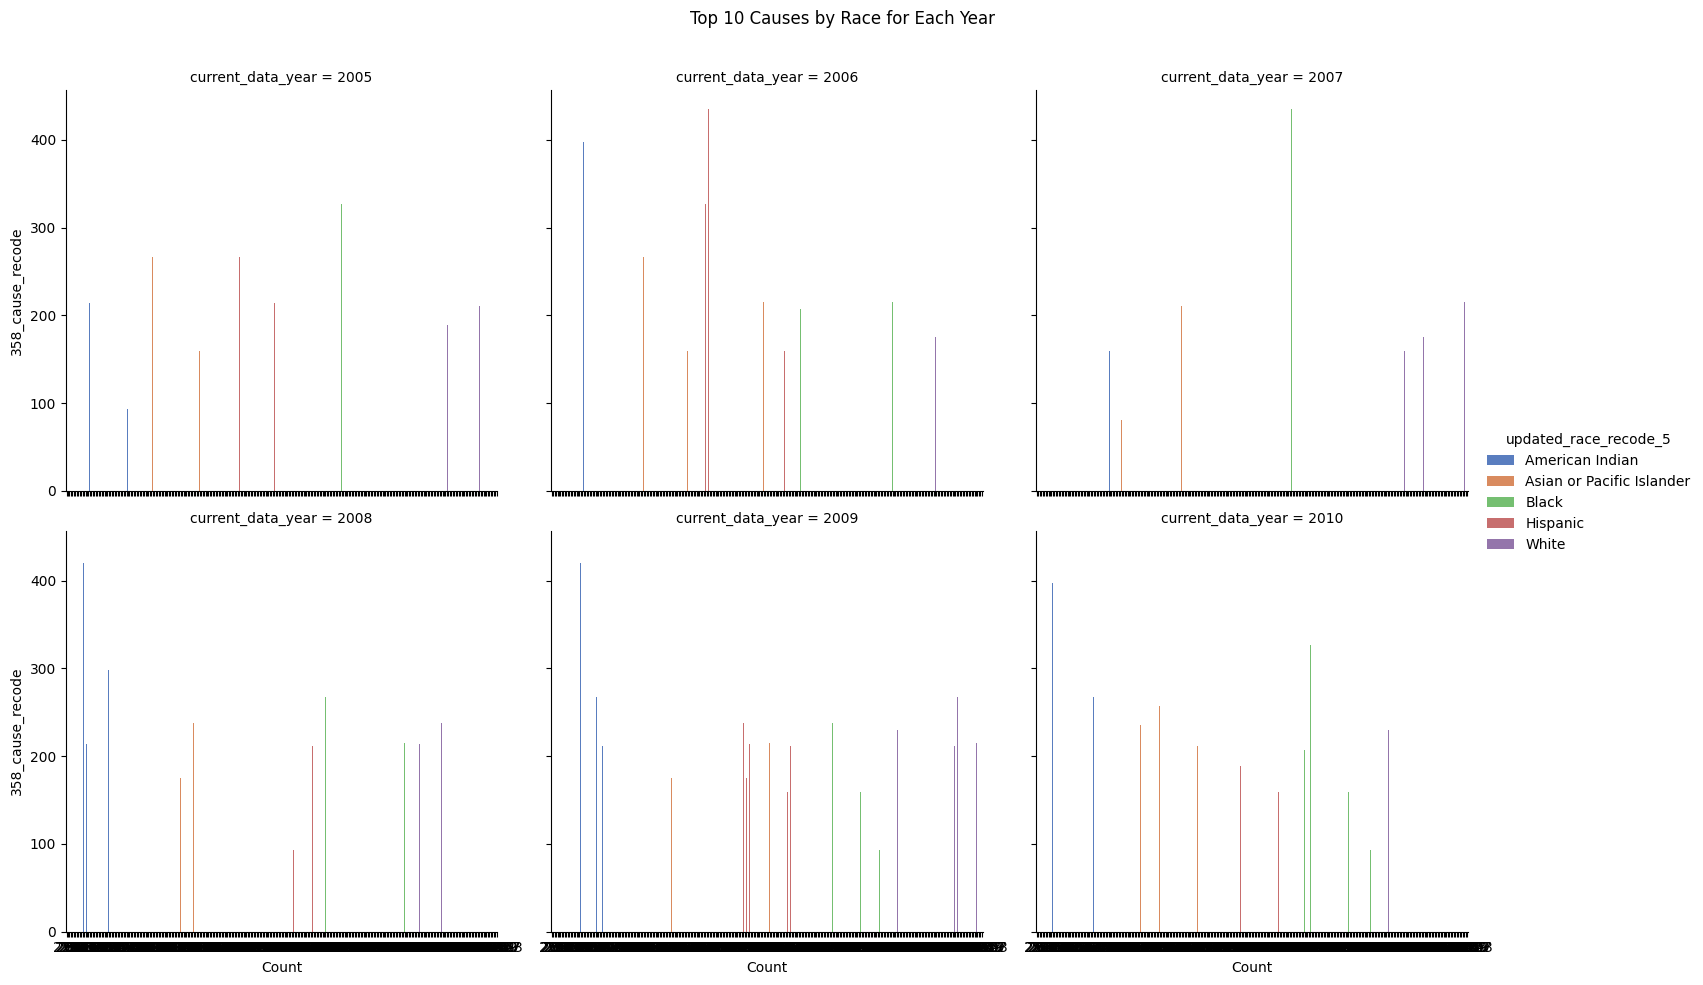

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 causes for each race in each year
g = sns.catplot(x="Count", y="358_cause_recode", hue="updated_race_recode_5", col="current_data_year", 
                data=top_10_causes_by_year_race, kind="bar", 
                height=5, aspect=1, col_wrap=3, palette="muted")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Top 10 Causes by Race for Each Year')
plt.show()

In [8]:
# Load the CSV file
mort2011 = pd.read_csv('/kaggle/input/mortality/2011_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2011_smaller = mort2011[columns_to_keep].copy()
print(mort2011_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2011_smaller.loc[:, 'race_recode_5'] = mort2011_smaller['race_recode_5'].astype(str)
mort2011_smaller.loc[:, 'hispanic_originrace_recode'] = mort2011_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2011_smaller.loc[:, 'updated_race_recode_5'] = mort2011_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2011_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_379/1862911678.py:2: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2011 = pd.read_csv('/kaggle/input/mortality/2011_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              1              9               129   F               2011   
1              3              8               104   F               2011   
2              1             10               215   M               2011   
3              1              8               214   F               2011   
4              3              4               396   M               2011   

   hispanic_originrace_recode  
0                           6  
1                           8  
2                           6  
3                           6  
4                           8  


/tmp/ipykernel_379/1862911678.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '3' '1' ... '2' '1' '2']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2011_smaller.loc[:, 'race_recode_5'] = mort2011_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_379/1862911678.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '8' '6' ... '7' '2' '7']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2011_smaller.loc[:, 'hispanic_originrace_recode'] = mort2011_smaller['hispanic_originrace_recode'].astype(str)


['White' 'American Indian' 'Asian or Pacific Islander' 'Black' 'Hispanic']


In [9]:
# Load the CSV file
mort2012 = pd.read_csv('/kaggle/input/mortality/2012_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2012_smaller = mort2012[columns_to_keep].copy()
print(mort2012_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2012_smaller.loc[:, 'race_recode_5'] = mort2012_smaller['race_recode_5'].astype(str)
mort2012_smaller.loc[:, 'hispanic_originrace_recode'] = mort2012_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2012_smaller.loc[:, 'updated_race_recode_5'] = mort2012_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2012_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_379/2224784934.py:2: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2012 = pd.read_csv('/kaggle/input/mortality/2012_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              1              8                93   F               2012   
1              1             11               175   F               2012   
2              3              8               301   F               2012   
3              1             11               327   M               2012   
4              1              7               313   M               2012   

   hispanic_originrace_recode  
0                           6  
1                           6  
2                           8  
3                           6  
4                           6  


/tmp/ipykernel_379/2224784934.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '3' ... '1' '2' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2012_smaller.loc[:, 'race_recode_5'] = mort2012_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_379/2224784934.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '6' '8' ... '6' '5' '6']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2012_smaller.loc[:, 'hispanic_originrace_recode'] = mort2012_smaller['hispanic_originrace_recode'].astype(str)


['White' 'American Indian' 'Asian or Pacific Islander' 'Black' 'Hispanic']


In [10]:
# Load the CSV file
mort2013 = pd.read_csv('/kaggle/input/mortality/2013_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2013_smaller = mort2013[columns_to_keep].copy()
print(mort2013_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2013_smaller.loc[:, 'race_recode_5'] = mort2013_smaller['race_recode_5'].astype(str)
mort2013_smaller.loc[:, 'hispanic_originrace_recode'] = mort2013_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2013_smaller.loc[:, 'updated_race_recode_5'] = mort2013_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2013_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_379/4088461166.py:2: DtypeWarning: Columns (39,40,41,42,43,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2013 = pd.read_csv('/kaggle/input/mortality/2013_data.csv')


   race_recode_5  age_recode_12  358_cause_recode sex  current_data_year  \
0              1             11               175   M               2013   
1              1             10               175   F               2013   
2              1              9               175   M               2013   
3              3             10               125   M               2013   
4              1             10                93   F               2013   

   hispanic_originrace_recode  
0                           6  
1                           6  
2                           6  
3                           8  
4                           6  


/tmp/ipykernel_379/4088461166.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '2' '2' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2013_smaller.loc[:, 'race_recode_5'] = mort2013_smaller['race_recode_5'].astype(str)
/tmp/ipykernel_379/4088461166.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '6' '6' ... '7' '9' '5']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mort2013_smaller.loc[:, 'hispanic_originrace_recode'] = mort2013_smaller['hispanic_originrace_recode'].astype(str)


['White' 'American Indian' 'Black' 'Asian or Pacific Islander' 'Hispanic']


In [ ]:
# Load the CSV file
mort2014 = pd.read_csv('/kaggle/input/mortality/2014_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2014_smaller = mort2014[columns_to_keep].copy()
print(mort2014_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2014_smaller.loc[:, 'race_recode_5'] = mort2014_smaller['race_recode_5'].astype(str)
mort2014_smaller.loc[:, 'hispanic_originrace_recode'] = mort2014_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2014_smaller.loc[:, 'updated_race_recode_5'] = mort2014_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2014_smaller['updated_race_recode_5'].unique())

/tmp/ipykernel_379/430653664.py:2: DtypeWarning: Columns (39,40,41,42,43,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  mort2014 = pd.read_csv('/kaggle/input/mortality/2014_data.csv')


In [ ]:
# Load the CSV file
mort2015 = pd.read_csv('/kaggle/input/mortality/2015_data.csv')

# Define the columns you want to keep
columns_to_keep = ['race_recode_5', 'age_recode_12', '358_cause_recode', 'sex', 'current_data_year', 'hispanic_originrace_recode']

# Create a smaller DataFrame with only the necessary columns
mort2015_smaller = mort2015[columns_to_keep].copy()
print(mort2015_smaller.head())

# Mappings for race and Hispanic origin recodes
race_recode_5_mapping = {
    "0": "Other (Puerto Rico only)",
    "1": "White",
    "2": "Black",
    "3": "American Indian",
    "4": "Asian or Pacific Islander"
}

hispanic_originrace_recode_mapping = {
    "1": "Mexican",
    "2": "Puerto Rican",
    "3": "Cuban",
    "4": "Central or South American",
    "5": "Other or unknown Hispanic",
    "6": "Non - Hispanic white",
    "7": "Non - Hispanic black",
    "8": "Non - Hispanic other races",
    "9": "Hispanic origin unknown"
}

# Define the function to update the race category
def update_race_category(race_recode_5, hispanic_originrace_recode):
    # Convert race_recode_5 value to its description
    race_recode_5_value = race_recode_5_mapping.get(str(race_recode_5), "Unknown")
    
    # Convert hispanic_originrace_recode value to its description
    hispanic_originrace_recode_value = hispanic_originrace_recode_mapping.get(str(hispanic_originrace_recode), "Unknown")
    
    # Define the list of Hispanic categories
    hispanic_categories = ["Mexican", "Puerto Rican", "Cuban", "Central or South American", "Other or unknown Hispanic"]
    
    # If the Hispanic origin is identified, update race_recode_5 to "Hispanic"
    if hispanic_originrace_recode_value in hispanic_categories:
        return "Hispanic"
    
    return race_recode_5_value

# Ensure that the columns are strings for consistent mapping
mort2015_smaller.loc[:, 'race_recode_5'] = mort2015_smaller['race_recode_5'].astype(str)
mort2015_smaller.loc[:, 'hispanic_originrace_recode'] = mort2015_smaller['hispanic_originrace_recode'].astype(str)

# Apply the function to update the race category
mort2015_smaller.loc[:, 'updated_race_recode_5'] = mort2015_smaller.apply(
    lambda row: update_race_category(row['race_recode_5'], row['hispanic_originrace_recode']),
    axis=1
)

# Display unique values in the updated race category column
print(mort2015_smaller['updated_race_recode_5'].unique())